Let's start off with importing all the relevant libraries which will be updated as we go

In [1]:
import pandas as pd
import math
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.0f}'.format
sns.set_style('white')

Read the csv file with the block names

In [2]:
df = pd.read_csv("G1 Competitors.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
A Block    10 non-null object
B Block    10 non-null object
dtypes: object(2)
memory usage: 240.0+ bytes


Only 10 entries with No null objects which is good to see, we can see what the whole dataframe looks like. Of course if we had more rows we wouldn't be able to do this.

In [4]:
df

,A Block,B Block
0,Hiroshi Tanahashi,Kazuchika Okada
1,Togi Makabe,Toru Yano
2,Tomohiro Ishii,Satoshi Kojima
3,Hirooki Goto,Michael Elgin
4,YOSHI-HASHI,Juice Robinson
5,Bad Luck Fale,Tama Tonga
6,Yuji Nagata,SANADA
7,Zack Sabre Jr.,EVIL
8,Kota Ibushi,Minoru Suzuki
9,Tetsuya Naito,Kenny Omega


Some of the wrestler's name have capitals while others don't, let's seperate these into two blocks and make sure we convert all strings to uppercase

In [5]:
A_Block = pd.DataFrame(df['A Block'].str.upper())
A_Block.columns = ['Wrestler']
B_Block = pd.DataFrame(df['B Block'].str.upper())
B_Block.columns = ['Wrestler']

In [6]:
A_Block['Matches'] = np.NAN
A_Block['Wins'] = np.NAN
A_Block['Losses'] = np.NAN
A_Block['Points'] = np.NAN
B_Block['Matches'] = np.NAN
B_Block['Wins'] = np.NAN
B_Block['Losses'] = np.NAN
B_Block['Points'] = np.NAN



How many potential matches per block?
Using the old perpmuations formula

In [7]:
math.factorial(10)/(math.factorial(2)*math.factorial(10-2))

45.0

Ok there are 45 possible matches, I was going to write a custom function to list all these out but the python community is so large someone has already done what you need. Luckily they have and it comes from the library itertools. We use the function combinations as we're looking for all unique combinations and not permutations. The combination takes a list so we can't simply pass in the data frame and need to select the Wrestler column as a series. W

In [8]:
A_matches = pd.DataFrame.from_records(list(itertools.combinations(A_Block['Wrestler'],2)), columns = ['Wrestler 1', 'Wrestler 2'])
B_matches = pd.DataFrame.from_records(list(itertools.combinations(B_Block['Wrestler'],2)), columns = ['Wrestler 1', 'Wrestler 2'])
A_matches['Winner'] = np.NAN
B_matches['Winner'] = np.NAN
A_matches['Loser'] = np.NAN
B_matches['Loser'] = np.NAN
A_matches['Match'] = 1
B_matches['Match'] = 1

In [9]:
A_matches

,Wrestler 1,Wrestler 2,Winner,Loser,Match
0,HIROSHI TANAHASHI,TOGI MAKABE,nan,nan,1
1,HIROSHI TANAHASHI,TOMOHIRO ISHII,nan,nan,1
2,HIROSHI TANAHASHI,HIROOKI GOTO,nan,nan,1
3,HIROSHI TANAHASHI,YOSHI-HASHI,nan,nan,1
4,HIROSHI TANAHASHI,BAD LUCK FALE,nan,nan,1
5,HIROSHI TANAHASHI,YUJI NAGATA,nan,nan,1
6,HIROSHI TANAHASHI,ZACK SABRE JR.,nan,nan,1
7,HIROSHI TANAHASHI,KOTA IBUSHI,nan,nan,1
8,HIROSHI TANAHASHI,TETSUYA NAITO,nan,nan,1
9,TOGI MAKABE,TOMOHIRO ISHII,nan,nan,1


Ok we now have a table of the potential matches, I decided to write a quick function to update the dataframe with the results rather than updating each row manually. I didn't want to type out the full names either as the spellings of Japanese names can be quite hard. So the function does a partial match and prints out the names it's matched as a check

In [10]:
def updateresults(df,winner,loser):#We want to find the index for the match for these two wrestlers
    winner = winner.upper()
    loser = loser.upper()
    w1 = list(df[df['Wrestler 1'].str.contains(winner)].index)
    w2 = list(df[df['Wrestler 2'].str.contains(winner)].index)
    w3 = w1 + w2
    if not w1:
        winner = df.iloc[w2[0],1]
    else:
        winner = df.iloc[w1[0],0]

    l1 = list(df[df['Wrestler 1'].str.contains(loser)].index)
    l2 = list(df[df['Wrestler 2'].str.contains(loser)].index)
    l3 = l1 + l2
    if not l1:
        loser = df.iloc[l2[0],1]
    else:
        loser = df.iloc[l1[0],0]
    i = list(set(w3).intersection(l3))
    i = i[0]
    print(winner + ',' +loser)
    df.iloc[i,2] = winner
    df.iloc[i,3] = loser
    
    

Update the A block matches with the Day 1 results. Really suprising results with Zack Sabre Jr going over Tanahashi and Testsuya Naito.

In [11]:
updateresults(A_matches, 'Zack', 'Tanahashi')
updateresults(A_matches, 'YOSHI', 'Nagata')
updateresults(A_matches, 'Fale', 'Togi')
updateresults(A_matches, 'Hirooki', 'Tomohiro')
updateresults(A_matches, 'Tetsuya', 'Kota')

ZACK SABRE JR.,HIROSHI TANAHASHI
YOSHI-HASHI,YUJI NAGATA
BAD LUCK FALE,TOGI MAKABE
HIROOKI GOTO,TOMOHIRO ISHII
TETSUYA NAITO,KOTA IBUSHI


Update the B block matches, no surprises with Okada and Omega going over. I expect one of them to be in the final

In [12]:
updateresults(B_matches,'Juice','Satoshi')
updateresults(B_matches,'Tonga','Elgin')
updateresults(B_matches,'Sanada','Evil')
updateresults(B_matches,'Okada','Yano')
updateresults(B_matches,'Omega','Suzuki')

JUICE ROBINSON,SATOSHI KOJIMA
TAMA TONGA,MICHAEL ELGIN
SANADA,EVIL
KAZUCHIKA OKADA,TORU YANO
KENNY OMEGA,MINORU SUZUKI


Now that we've got some results, let's update the A block and B block tables that summarise the current standings. I was looking for the equivalent of Excel's countif and found that you can the Series.map function. In the tournamenet a win counts as 2 points, tie counts as 1(having factored this in yet) and 0 points for a loss. This can be a function I think that updates

In [13]:
def updatetable():
    global A_Block
    global B_Block
    A_Block['Wins'] = A_Block['Wrestler'].map(A_matches['Winner'].value_counts())
    A_Block['Losses'] = A_Block['Wrestler'].map(A_matches['Loser'].value_counts())
    A_Block = A_Block.fillna(0)#replace the nan's with zeroes so we can tally later
    A_Block['Matches'] = A_Block['Wins'] + A_Block['Losses']
    A_Block['Points'] = A_Block['Wins']*2
    A_Block = A_Block.sort_values(['Points'],ascending=False).reset_index(drop=True)
    B_Block['Wins'] = B_Block['Wrestler'].map(B_matches['Winner'].value_counts())
    B_Block['Losses'] = B_Block['Wrestler'].map(B_matches['Loser'].value_counts())
    B_Block = B_Block.fillna(0)
    B_Block['Matches'] = B_Block['Wins'] + B_Block['Losses']
    B_Block = B_Block[['Wrestler','Matches','Wins','Losses']]
    B_Block['Points'] = B_Block['Wins']*2
    B_Block = B_Block.sort_values(['Points'],ascending=False).reset_index(drop=True)

In [20]:
updatetable()

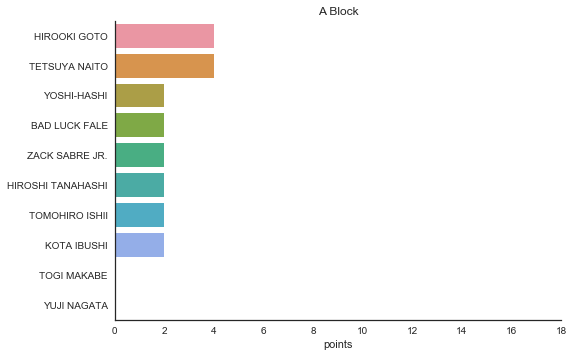

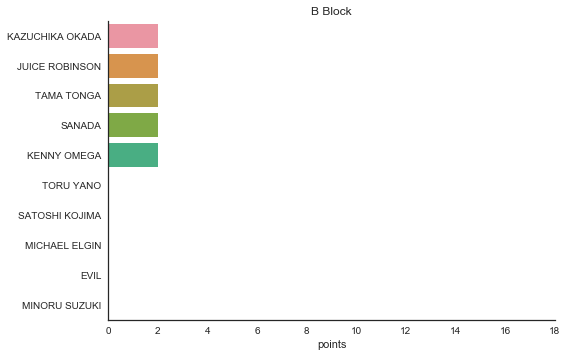

In [21]:
ax= sns.barplot(y='Wrestler', x='Points', data=A_Block)
ax.set_xlim(0,18)
sns.despine()
ax.set_ylabel('')
ax.set_xlabel('points')
ax.set_title('A Block')
plt.show()
ax= sns.barplot(y='Wrestler', x='Points', data=B_Block)
ax.set_xlim(0,18)
sns.despine()
ax.set_ylabel('') 
ax.set_xlabel('points')
ax.set_title('B Block')
plt.show()

In [18]:
updateresults(A_matches, 'Hirooki', 'Nagata')
updateresults(A_matches,'ISHII', 'Togi')
updateresults(A_matches,'Ibushi', 'Zack')
updateresults(A_matches,'Tanaha', 'Fale')
updateresults(A_matches,'Tetsuya', 'Yoshi')

HIROOKI GOTO,YUJI NAGATA
TOMOHIRO ISHII,TOGI MAKABE
KOTA IBUSHI,ZACK SABRE JR.
HIROSHI TANAHASHI,BAD LUCK FALE
TETSUYA NAITO,YOSHI-HASHI
